In [31]:
import csv
import math as m
l1 = 50
l2 = 40
with open('robot2b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-180,180,1):
    for tt2 in range(-180,180,1):
      tt1 = (tt1*m.pi)/180
      tt2 = (tt2*m.pi)/180
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [32]:
import pandas as pd
data=pd.read_csv('robot2b.csv')
data

,tt1,tt2,Px,Py
0,-3.141593e+00,-3.141593,-10.000000,3.673940e-15
1,-5.483114e-02,-3.124139,9.952796,-1.245418e+00
2,-9.569838e-04,-3.106686,10.023026,-1.405572e+00
3,-1.670252e-05,-3.089233,10.054784,-2.093606e+00
4,-2.915140e-07,-3.071779,10.097437,-2.790262e+00
...,...,...,...,...
129595,0.000000e+00,3.054326,10.152212,3.486230e+00
129596,0.000000e+00,3.071779,10.097438,2.790259e+00
129597,0.000000e+00,3.089233,10.054819,2.093438e+00
129598,0.000000e+00,3.106686,10.024367,1.395980e+00


In [34]:
x=data.drop(data.columns[:2],axis=1)
x

,Px,Py
0,-10.000000,3.673940e-15
1,9.952796,-1.245418e+00
2,10.023026,-1.405572e+00
3,10.054784,-2.093606e+00
4,10.097437,-2.790262e+00
...,...,...
129595,10.152212,3.486230e+00
129596,10.097438,2.790259e+00
129597,10.054819,2.093438e+00
129598,10.024367,1.395980e+00


In [35]:
y=data.drop(data.columns[2:],axis=1)
y

,tt1,tt2
0,-3.141593e+00,-3.141593
1,-5.483114e-02,-3.124139
2,-9.569838e-04,-3.106686
3,-1.670252e-05,-3.089233
4,-2.915140e-07,-3.071779
...,...,...
129595,0.000000e+00,3.054326
129596,0.000000e+00,3.071779
129597,0.000000e+00,3.089233
129598,0.000000e+00,3.106686


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout #Dropout: gia tri dung xu li
model=Sequential()
model.add(Dense(30,activation='relu',input_shape=(2,)))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                90        
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 2)                 62        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
608/608 [==============================] - 5s 5ms/step - loss: 1.3455 - accuracy: 0.9822 - val_loss: 1.3473 - val_accuracy: 0.9596
Epoch 2/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3453 - accuracy: 0.9829 - val_loss: 1.3442 - val_accuracy: 0.9962
Epoch 3/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3451 - accuracy: 0.9840 - val_loss: 1.3447 - val_accuracy: 0.9851
Epoch 4/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3450 - accuracy: 0.9852 - val_loss: 1.3448 - val_accuracy: 0.9794
Epoch 5/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3449 - accuracy: 0.9889 - val_loss: 1.3443 - val_accuracy: 0.9962
Epoch 6/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3448 - accuracy: 0.9894 - val_loss: 1.3458 - val_accuracy: 0.9707
Epoch 7/50
608/608 [==============================] - 1s 2ms/step - loss: 1.3447 - accuracy: 0.9907 - val_loss: 1.3446 - val_accuracy: 0.9849
Epoch 

In [42]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

sai so kiem tra la: 1.3417751789093018
do chinh xac kiem tra la: 0.9935802221298218


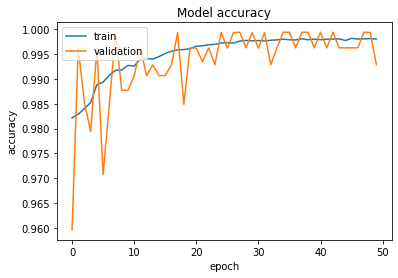

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [15]:
model.save('robot2b.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('robot2b.h5')